     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
5     64    1   0       170   227    0        2      155      0      0.6   
6     63    1   0       145   233    1        2      150      0      2.3   
7     61    1   0       134   234    0        0      145      0      2.6   
8     60    0   0       150   240    0        0      171      0      0.9   
9     59    1   0       178   270    0        2      145      0      4.2   
10    59    1   0       170   288    0        2      159      0      0.2   
11    59    1   0       160   273    0        2      125      0      0.0   
12    59    

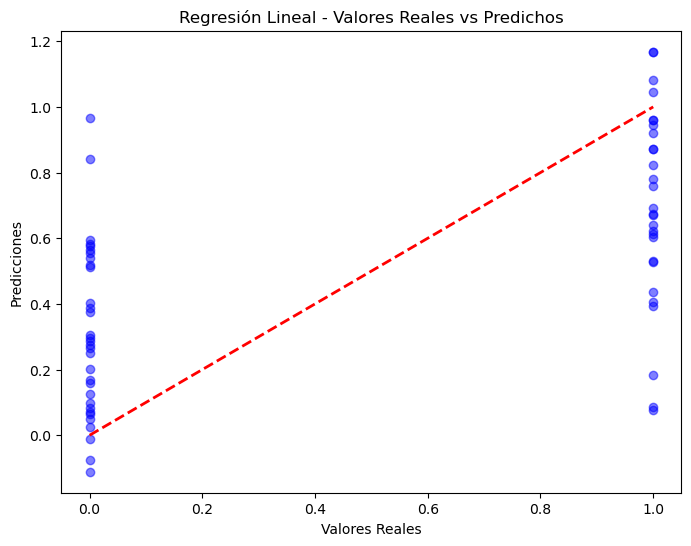

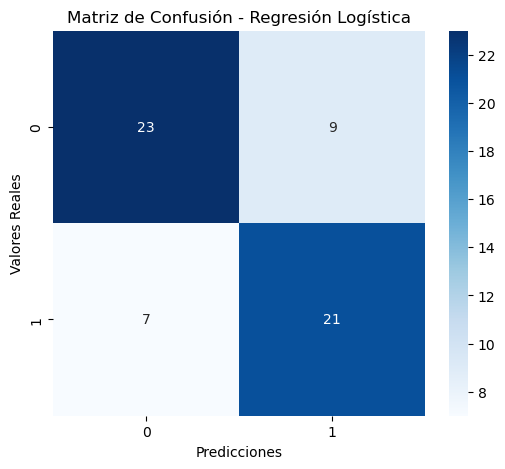

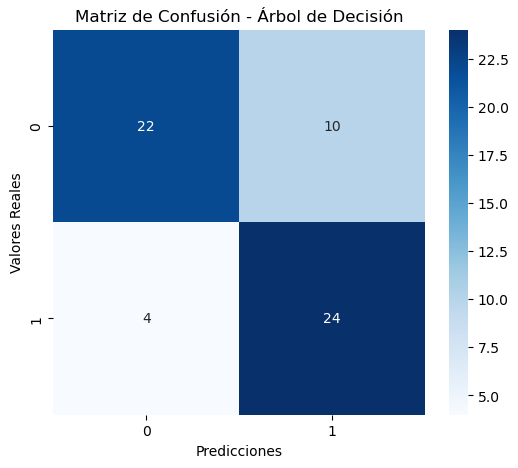

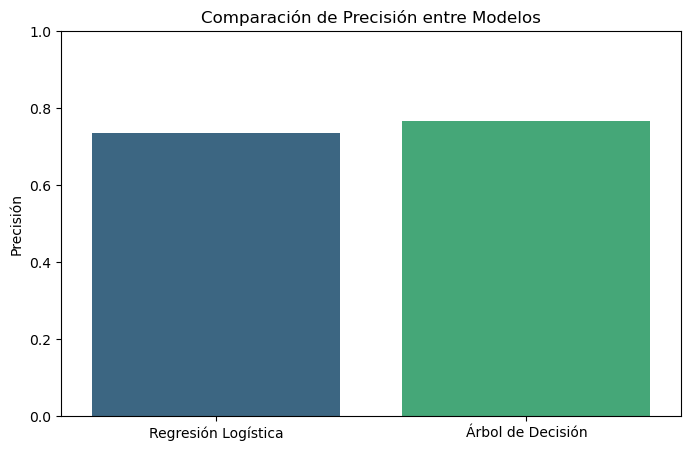

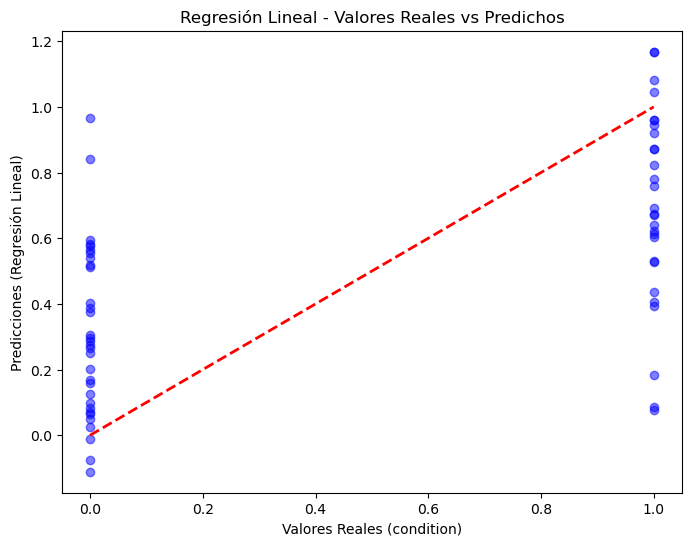

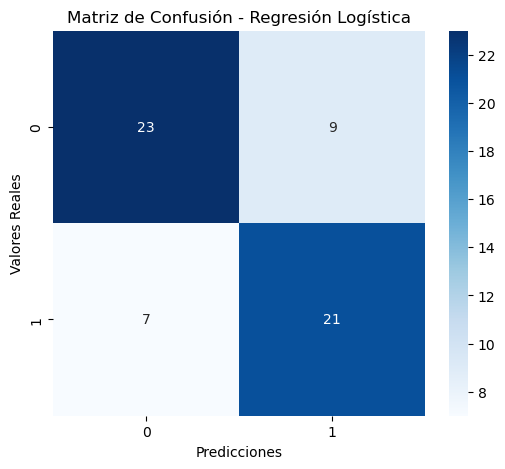

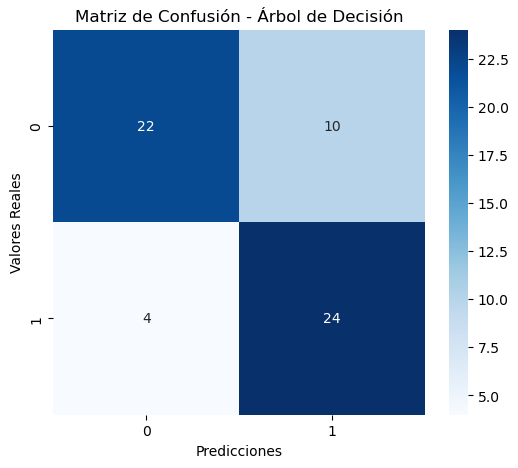

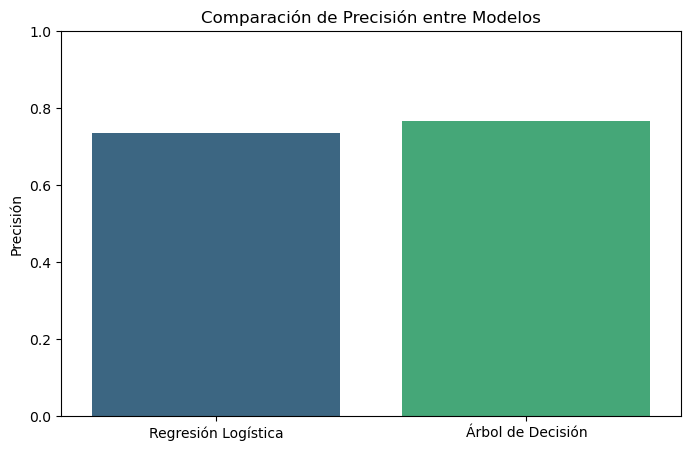

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.impute import SimpleImputer


    
df = pd.read_csv("heart_cleveland_upload.csv")
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
print(df)
print("\nNombres de las columnas en el DataFrame:")
print(df.columns)

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['condition'])  
y = df['condition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_lineal = modelo_lineal.predict(X_test)

y_binary = (y > y.median()).astype(int)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train_bin, y_train_bin)
y_pred_logistico = modelo_logistico.predict(X_test_bin)

modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_train, y_train)
y_pred_arbol = modelo_arbol.predict(X_test)

print("Modelo entrenado con éxito")

# 🔹 Evaluación de los Modelos
print("🔹 Evaluación Regresión Lineal")
print("R^2 Score:", modelo_lineal.score(X_test, y_test))

print("\n🔹 Evaluación Regresión Logística")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_logistico))
print(classification_report(y_test_bin, y_pred_logistico))

cm_log_df = confusion_matrix(y_test_bin, y_pred_logistico)
specificity_log_df = cm_log_df[0, 0] / (cm_log_df[0, 0] + cm_log_df[0, 1])
print("Specificity (Regresión Logística - df):", round(specificity_log_df, 4))

# Convertir predicciones del árbol de decisión a binario
y_pred_arbol_bin = (y_pred_arbol > y.median()).astype(int)

print("\n🔹 Evaluación Árbol de Decisión")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_arbol_bin))
print(classification_report(y_test_bin, y_pred_arbol_bin))

cm_arbol_df = confusion_matrix(y_test_bin, y_pred_arbol_bin)
specificity_arbol_df = cm_arbol_df[0, 0] / (cm_arbol_df[0, 0] + cm_arbol_df[0, 1])
print("Specificity (Árbol de Decisión - df):", round(specificity_arbol_df, 4))

# Gráfico de dispersión para Regresión Lineal
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lineal, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Línea de referencia perfecta
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal - Valores Reales vs Predichos")
plt.show()

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.title(title)
    plt.show()

# Graficar matrices de confusión
plot_confusion_matrix(y_test_bin, y_pred_logistico, "Matriz de Confusión - Regresión Logística")
plot_confusion_matrix(y_test_bin, y_pred_arbol_bin, "Matriz de Confusión - Árbol de Decisión")

# Crear un diccionario con las métricas de cada modelo
modelos = ["Regresión Logística", "Árbol de Decisión"]
accuracy_scores = [accuracy_score(y_test_bin, y_pred_logistico), accuracy_score(y_test_bin, y_pred_arbol_bin)]

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=modelos, y=accuracy_scores, hue=modelos, palette="viridis", legend=False)
plt.ylim(0, 1)
plt.ylabel("Precisión")
plt.title("Comparación de Precisión entre Modelos")
plt.show()

# 📊 Gráfico de dispersión para Regresión Lineal
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lineal, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  
plt.xlabel("Valores Reales (condition)")
plt.ylabel("Predicciones (Regresión Lineal)")
plt.title("Regresión Lineal - Valores Reales vs Predichos")
plt.show()

# 📊 Matriz de Confusión para Regresión Logística y Árbol de Decisión
plot_confusion_matrix(y_test_bin, y_pred_logistico, "Matriz de Confusión - Regresión Logística")
plot_confusion_matrix(y_test_bin, y_pred_arbol_bin, "Matriz de Confusión - Árbol de Decisión")

# 📊 Comparación de Modelos en Precisión
modelos = ["Regresión Logística", "Árbol de Decisión"]
accuracy_scores = [accuracy_score(y_test_bin, y_pred_logistico), accuracy_score(y_test_bin, y_pred_arbol_bin)]
plt.figure(figsize=(8, 5))
sns.barplot(x=modelos, y=accuracy_scores, hue=modelos, palette="viridis", legend=False)
plt.ylim(0, 1)
plt.ylabel("Precisión")
plt.title("Comparación de Precisión entre Modelos")
plt.show()